In [1]:
import warnings                                  
warnings.filterwarnings('ignore')   
import requests
from bs4 import BeautifulSoup
import pandas as pd
import json
import missingno as msno
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
from plotnine import * 
import seaborn as sns
import folium

In [2]:
url = 'http://apis.data.go.kr/B552584/ArpltnStatsSvc/getCtprvnMesureLIst'
params ={'serviceKey' : '2ndTtadAkDFYE4IoviJiapE4hDGflZXPB+KJgoY0spETrw95rMZCalxUMO1tJ5lPwCe/4fMVTkcOw+qTP5tcEw==', 
         'returnType' : 'xml',
         'numOfRows' : '100',
         'pageNo' : '1',
         'itemCode' : 'PM10', 
         'dataGubun' : 'HOUR', 
         'searchCondition' : 'MONTH' }

req = requests.get(url, params=params)
soup = BeautifulSoup(req.text, 'html.parser')
items = soup.find_all('item')

columns = []
for item in items[0]:
    if item.name != None:
        columns.append(item.name)

covid_data = []
for item in items:
    data = []
    for i in item:
        if i != '\n':
            data.append(i.text)
    covid_data.append(data)


In [3]:
df = pd.DataFrame(covid_data, columns=columns)
df

,daegu,chungnam,incheon,daejeon,gyeongbuk,sejong,gwangju,jeonbuk,gangwon,ulsan,jeonnam,seoul,busan,jeju,chungbuk,gyeongnam,datatime,datagubun,gyeonggi,itemcode
0,51,34,27,52,48,46,53,45,45,51,45,36,53,25,62,38,2023-01-27 11:00,1,41,PM10
1,54,44,31,56,47,60,57,55,42,54,45,35,54,26,53,39,2023-01-27 10:00,1,48,PM10
2,55,48,40,46,43,53,56,54,37,51,42,43,52,27,49,41,2023-01-27 09:00,1,53,PM10
3,48,49,49,43,38,50,50,52,36,44,41,52,55,27,44,41,2023-01-27 08:00,1,54,PM10
4,41,49,54,40,36,48,44,49,34,46,40,59,56,26,42,40,2023-01-27 07:00,1,54,PM10
5,38,47,57,40,34,45,40,44,32,50,35,57,53,38,40,40,2023-01-27 06:00,1,53,PM10
6,37,46,58,38,37,42,38,40,31,49,33,58,51,50,39,39,2023-01-27 05:00,1,52,PM10
7,36,45,57,38,34,45,36,37,31,47,34,55,31,49,37,35,2023-01-27 04:00,1,51,PM10
8,31,45,57,30,31,41,40,35,31,31,33,55,27,44,37,32,2023-01-27 03:00,1,49,PM10
9,30,45,54,31,28,40,34,36,31,28,33,51,29,36,39,27,2023-01-27 02:00,1,47,PM10


In [4]:
df = df.drop('datagubun', axis=1)
df.drop(['gyeonggi','itemcode'], axis=1, inplace=True)
df

,daegu,chungnam,incheon,daejeon,gyeongbuk,sejong,gwangju,jeonbuk,gangwon,ulsan,jeonnam,seoul,busan,jeju,chungbuk,gyeongnam,datatime
0,51,34,27,52,48,46,53,45,45,51,45,36,53,25,62,38,2023-01-27 11:00
1,54,44,31,56,47,60,57,55,42,54,45,35,54,26,53,39,2023-01-27 10:00
2,55,48,40,46,43,53,56,54,37,51,42,43,52,27,49,41,2023-01-27 09:00
3,48,49,49,43,38,50,50,52,36,44,41,52,55,27,44,41,2023-01-27 08:00
4,41,49,54,40,36,48,44,49,34,46,40,59,56,26,42,40,2023-01-27 07:00
5,38,47,57,40,34,45,40,44,32,50,35,57,53,38,40,40,2023-01-27 06:00
6,37,46,58,38,37,42,38,40,31,49,33,58,51,50,39,39,2023-01-27 05:00
7,36,45,57,38,34,45,36,37,31,47,34,55,31,49,37,35,2023-01-27 04:00
8,31,45,57,30,31,41,40,35,31,31,33,55,27,44,37,32,2023-01-27 03:00
9,30,45,54,31,28,40,34,36,31,28,33,51,29,36,39,27,2023-01-27 02:00


In [5]:
df.columns = ['대구', '충청남도', '인천', '대전', '경상북도', '세종', '광주', '전라북도', '강원도', '울산', '전라남도', '서울', '부산', '제주', '충청북도', '경상남도', '측정시간']
df

,대구,충청남도,인천,대전,경상북도,세종,광주,전라북도,강원도,울산,전라남도,서울,부산,제주,충청북도,경상남도,측정시간
0,51,34,27,52,48,46,53,45,45,51,45,36,53,25,62,38,2023-01-27 11:00
1,54,44,31,56,47,60,57,55,42,54,45,35,54,26,53,39,2023-01-27 10:00
2,55,48,40,46,43,53,56,54,37,51,42,43,52,27,49,41,2023-01-27 09:00
3,48,49,49,43,38,50,50,52,36,44,41,52,55,27,44,41,2023-01-27 08:00
4,41,49,54,40,36,48,44,49,34,46,40,59,56,26,42,40,2023-01-27 07:00
5,38,47,57,40,34,45,40,44,32,50,35,57,53,38,40,40,2023-01-27 06:00
6,37,46,58,38,37,42,38,40,31,49,33,58,51,50,39,39,2023-01-27 05:00
7,36,45,57,38,34,45,36,37,31,47,34,55,31,49,37,35,2023-01-27 04:00
8,31,45,57,30,31,41,40,35,31,31,33,55,27,44,37,32,2023-01-27 03:00
9,30,45,54,31,28,40,34,36,31,28,33,51,29,36,39,27,2023-01-27 02:00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   대구      25 non-null     object
 1   충청남도    25 non-null     object
 2   인천      25 non-null     object
 3   대전      25 non-null     object
 4   경상북도    25 non-null     object
 5   세종      25 non-null     object
 6   광주      25 non-null     object
 7   전라북도    25 non-null     object
 8   강원도     25 non-null     object
 9   울산      25 non-null     object
 10  전라남도    25 non-null     object
 11  서울      25 non-null     object
 12  부산      25 non-null     object
 13  제주      25 non-null     object
 14  충청북도    25 non-null     object
 15  경상남도    25 non-null     object
 16  측정시간    25 non-null     object
dtypes: object(17)
memory usage: 3.4+ KB


In [7]:
df.loc[df['전라북도'] == '', '전라북도'] = 0

In [8]:
df['대구'] = df['대구'].astype(int)
df['충청남도'] = df['충청남도'].astype(int)
df['인천'] = df['인천'].astype(int)
df['대전'] = df['대전'].astype(int)
df['경상북도'] = df['경상북도'].astype(int)
df['세종'] = df['세종'].astype(int)
df['광주'] = df['광주'].astype(int)
df['전라북도'] = df['전라북도'].astype(int)
df['강원도'] = df['강원도'].astype(int)
df['울산'] = df['울산'].astype(int)
df['전라남도'] = df['전라남도'].astype(int)
df['서울'] = df['서울'].astype(int)
df['부산'] = df['부산'].astype(int)
df['제주'] = df['제주'].astype(int)
df['충청북도'] = df['충청북도'].astype(int)
df['경상남도'] = df['경상남도'].astype(int)

In [9]:
df

,대구,충청남도,인천,대전,경상북도,세종,광주,전라북도,강원도,울산,전라남도,서울,부산,제주,충청북도,경상남도,측정시간
0,51,34,27,52,48,46,53,45,45,51,45,36,53,25,62,38,2023-01-27 11:00
1,54,44,31,56,47,60,57,55,42,54,45,35,54,26,53,39,2023-01-27 10:00
2,55,48,40,46,43,53,56,54,37,51,42,43,52,27,49,41,2023-01-27 09:00
3,48,49,49,43,38,50,50,52,36,44,41,52,55,27,44,41,2023-01-27 08:00
4,41,49,54,40,36,48,44,49,34,46,40,59,56,26,42,40,2023-01-27 07:00
5,38,47,57,40,34,45,40,44,32,50,35,57,53,38,40,40,2023-01-27 06:00
6,37,46,58,38,37,42,38,40,31,49,33,58,51,50,39,39,2023-01-27 05:00
7,36,45,57,38,34,45,36,37,31,47,34,55,31,49,37,35,2023-01-27 04:00
8,31,45,57,30,31,41,40,35,31,31,33,55,27,44,37,32,2023-01-27 03:00
9,30,45,54,31,28,40,34,36,31,28,33,51,29,36,39,27,2023-01-27 02:00


In [10]:
df.loc[df['전라북도'] == 0, '전라북도'] = (df.loc[df['전라북도'] == 0, '광주'] + df.loc[df['전라북도'] == 0, '대전']) / 2
df

,대구,충청남도,인천,대전,경상북도,세종,광주,전라북도,강원도,울산,전라남도,서울,부산,제주,충청북도,경상남도,측정시간
0,51,34,27,52,48,46,53,45.0,45,51,45,36,53,25,62,38,2023-01-27 11:00
1,54,44,31,56,47,60,57,55.0,42,54,45,35,54,26,53,39,2023-01-27 10:00
2,55,48,40,46,43,53,56,54.0,37,51,42,43,52,27,49,41,2023-01-27 09:00
3,48,49,49,43,38,50,50,52.0,36,44,41,52,55,27,44,41,2023-01-27 08:00
4,41,49,54,40,36,48,44,49.0,34,46,40,59,56,26,42,40,2023-01-27 07:00
5,38,47,57,40,34,45,40,44.0,32,50,35,57,53,38,40,40,2023-01-27 06:00
6,37,46,58,38,37,42,38,40.0,31,49,33,58,51,50,39,39,2023-01-27 05:00
7,36,45,57,38,34,45,36,37.0,31,47,34,55,31,49,37,35,2023-01-27 04:00
8,31,45,57,30,31,41,40,35.0,31,31,33,55,27,44,37,32,2023-01-27 03:00
9,30,45,54,31,28,40,34,36.0,31,28,33,51,29,36,39,27,2023-01-27 02:00


In [11]:
df.dtypes

대구        int32
충청남도      int32
인천        int32
대전        int32
경상북도      int32
세종        int32
광주        int32
전라북도    float64
강원도       int32
울산        int32
전라남도      int32
서울        int32
부산        int32
제주        int32
충청북도      int32
경상남도      int32
측정시간     object
dtype: object

In [12]:
df['전라북도'] = df['전라북도'].astype(int)

In [13]:
df.dtypes

대구       int32
충청남도     int32
인천       int32
대전       int32
경상북도     int32
세종       int32
광주       int32
전라북도     int32
강원도      int32
울산       int32
전라남도     int32
서울       int32
부산       int32
제주       int32
충청북도     int32
경상남도     int32
측정시간    object
dtype: object

In [14]:
df

,대구,충청남도,인천,대전,경상북도,세종,광주,전라북도,강원도,울산,전라남도,서울,부산,제주,충청북도,경상남도,측정시간
0,51,34,27,52,48,46,53,45,45,51,45,36,53,25,62,38,2023-01-27 11:00
1,54,44,31,56,47,60,57,55,42,54,45,35,54,26,53,39,2023-01-27 10:00
2,55,48,40,46,43,53,56,54,37,51,42,43,52,27,49,41,2023-01-27 09:00
3,48,49,49,43,38,50,50,52,36,44,41,52,55,27,44,41,2023-01-27 08:00
4,41,49,54,40,36,48,44,49,34,46,40,59,56,26,42,40,2023-01-27 07:00
5,38,47,57,40,34,45,40,44,32,50,35,57,53,38,40,40,2023-01-27 06:00
6,37,46,58,38,37,42,38,40,31,49,33,58,51,50,39,39,2023-01-27 05:00
7,36,45,57,38,34,45,36,37,31,47,34,55,31,49,37,35,2023-01-27 04:00
8,31,45,57,30,31,41,40,35,31,31,33,55,27,44,37,32,2023-01-27 03:00
9,30,45,54,31,28,40,34,36,31,28,33,51,29,36,39,27,2023-01-27 02:00


In [15]:
df.insert(16, '지역', '-')
df['수치'] = 0
df

,대구,충청남도,인천,대전,경상북도,세종,광주,전라북도,강원도,울산,전라남도,서울,부산,제주,충청북도,경상남도,지역,측정시간,수치
0,51,34,27,52,48,46,53,45,45,51,45,36,53,25,62,38,-,2023-01-27 11:00,0
1,54,44,31,56,47,60,57,55,42,54,45,35,54,26,53,39,-,2023-01-27 10:00,0
2,55,48,40,46,43,53,56,54,37,51,42,43,52,27,49,41,-,2023-01-27 09:00,0
3,48,49,49,43,38,50,50,52,36,44,41,52,55,27,44,41,-,2023-01-27 08:00,0
4,41,49,54,40,36,48,44,49,34,46,40,59,56,26,42,40,-,2023-01-27 07:00,0
5,38,47,57,40,34,45,40,44,32,50,35,57,53,38,40,40,-,2023-01-27 06:00,0
6,37,46,58,38,37,42,38,40,31,49,33,58,51,50,39,39,-,2023-01-27 05:00,0
7,36,45,57,38,34,45,36,37,31,47,34,55,31,49,37,35,-,2023-01-27 04:00,0
8,31,45,57,30,31,41,40,35,31,31,33,55,27,44,37,32,-,2023-01-27 03:00,0
9,30,45,54,31,28,40,34,36,31,28,33,51,29,36,39,27,-,2023-01-27 02:00,0


In [16]:
timecnt = len(df.index)
areacnt = len(df.columns) - 3
print(len(df.index))
print(len(df.columns) - 3)
print((len(df.columns) - 3) * len(df.index))

25
16
400


In [17]:
for i in range(timecnt * areacnt - timecnt):
    df.loc[timecnt + i] = 0
    
df

,대구,충청남도,인천,대전,경상북도,세종,광주,전라북도,강원도,울산,전라남도,서울,부산,제주,충청북도,경상남도,지역,측정시간,수치
0,51,34,27,52,48,46,53,45,45,51,45,36,53,25,62,38,-,2023-01-27 11:00,0
1,54,44,31,56,47,60,57,55,42,54,45,35,54,26,53,39,-,2023-01-27 10:00,0
2,55,48,40,46,43,53,56,54,37,51,42,43,52,27,49,41,-,2023-01-27 09:00,0
3,48,49,49,43,38,50,50,52,36,44,41,52,55,27,44,41,-,2023-01-27 08:00,0
4,41,49,54,40,36,48,44,49,34,46,40,59,56,26,42,40,-,2023-01-27 07:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
396,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
397,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
398,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
for i in range(timecnt):
    for j in range(areacnt):
        df.loc[df.index[(areacnt * i) + j], '지역'] = df.columns[j]
df

,대구,충청남도,인천,대전,경상북도,세종,광주,전라북도,강원도,울산,전라남도,서울,부산,제주,충청북도,경상남도,지역,측정시간,수치
0,51,34,27,52,48,46,53,45,45,51,45,36,53,25,62,38,대구,2023-01-27 11:00,0
1,54,44,31,56,47,60,57,55,42,54,45,35,54,26,53,39,충청남도,2023-01-27 10:00,0
2,55,48,40,46,43,53,56,54,37,51,42,43,52,27,49,41,인천,2023-01-27 09:00,0
3,48,49,49,43,38,50,50,52,36,44,41,52,55,27,44,41,대전,2023-01-27 08:00,0
4,41,49,54,40,36,48,44,49,34,46,40,59,56,26,42,40,경상북도,2023-01-27 07:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,서울,0,0
396,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,부산,0,0
397,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,제주,0,0
398,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,충청북도,0,0


In [19]:
time = []
for j in range(timecnt):
    time.append(df.loc[df.index[j], '측정시간'])
print(time)

['2023-01-27 11:00', '2023-01-27 10:00', '2023-01-27 09:00', '2023-01-27 08:00', '2023-01-27 07:00', '2023-01-27 06:00', '2023-01-27 05:00', '2023-01-27 04:00', '2023-01-27 03:00', '2023-01-27 02:00', '2023-01-27 01:00', '2023-01-26 24:00', '2023-01-26 23:00', '2023-01-26 22:00', '2023-01-26 21:00', '2023-01-26 20:00', '2023-01-26 19:00', '2023-01-26 18:00', '2023-01-26 17:00', '2023-01-26 16:00', '2023-01-26 15:00', '2023-01-26 14:00', '2023-01-26 13:00', '2023-01-26 12:00', '2023-01-26 11:00']


In [20]:
for i in range(timecnt):
    for j in range(areacnt):
        df.loc[df.index[(areacnt * i) + j], '측정시간'] = time[i]
df

,대구,충청남도,인천,대전,경상북도,세종,광주,전라북도,강원도,울산,전라남도,서울,부산,제주,충청북도,경상남도,지역,측정시간,수치
0,51,34,27,52,48,46,53,45,45,51,45,36,53,25,62,38,대구,2023-01-27 11:00,0
1,54,44,31,56,47,60,57,55,42,54,45,35,54,26,53,39,충청남도,2023-01-27 11:00,0
2,55,48,40,46,43,53,56,54,37,51,42,43,52,27,49,41,인천,2023-01-27 11:00,0
3,48,49,49,43,38,50,50,52,36,44,41,52,55,27,44,41,대전,2023-01-27 11:00,0
4,41,49,54,40,36,48,44,49,34,46,40,59,56,26,42,40,경상북도,2023-01-27 11:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,서울,2023-01-26 11:00,0
396,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,부산,2023-01-26 11:00,0
397,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,제주,2023-01-26 11:00,0
398,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,충청북도,2023-01-26 11:00,0


In [21]:
for i in range(timecnt):
    for j in range(areacnt):
        df.loc[df.index[(areacnt * i) + j], '수치'] = df.loc[df.index[i], df.columns[j]]
df

,대구,충청남도,인천,대전,경상북도,세종,광주,전라북도,강원도,울산,전라남도,서울,부산,제주,충청북도,경상남도,지역,측정시간,수치
0,51,34,27,52,48,46,53,45,45,51,45,36,53,25,62,38,대구,2023-01-27 11:00,51
1,54,44,31,56,47,60,57,55,42,54,45,35,54,26,53,39,충청남도,2023-01-27 11:00,34
2,55,48,40,46,43,53,56,54,37,51,42,43,52,27,49,41,인천,2023-01-27 11:00,27
3,48,49,49,43,38,50,50,52,36,44,41,52,55,27,44,41,대전,2023-01-27 11:00,52
4,41,49,54,40,36,48,44,49,34,46,40,59,56,26,42,40,경상북도,2023-01-27 11:00,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,서울,2023-01-26 11:00,31
396,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,부산,2023-01-26 11:00,27
397,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,제주,2023-01-26 11:00,9
398,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,충청북도,2023-01-26 11:00,31


In [22]:
result = df[['지역','측정시간','수치']]
result

,지역,측정시간,수치
0,대구,2023-01-27 11:00,51
1,충청남도,2023-01-27 11:00,34
2,인천,2023-01-27 11:00,27
3,대전,2023-01-27 11:00,52
4,경상북도,2023-01-27 11:00,48
...,...,...,...
395,서울,2023-01-26 11:00,31
396,부산,2023-01-26 11:00,27
397,제주,2023-01-26 11:00,9
398,충청북도,2023-01-26 11:00,31


In [23]:
sido_sum = result.pivot_table('수치','지역',aggfunc='sum').reset_index()
sido_sum

,지역,수치
0,강원도,714
1,경상남도,765
2,경상북도,728
3,광주,890
4,대구,958
5,대전,853
6,부산,928
7,서울,1039
8,세종,1040
9,울산,854


In [24]:
def geocoding(address):
    geolocoder = Nominatim(user_agent='South Korea', timeout=None)
    geo = geolocoder.geocode(address)
    return {'lat': str(geo.latitude), 'lot': str(geo.longitude)}


for i in range(len(sido_sum.index)):
    address = geocoding(sido_sum.loc[sido_sum.index[i],'지역'])

    sido_sum.loc[sido_sum.index[i],'위도'] = address['lat']
    sido_sum.loc[sido_sum.index[i],'경도'] = address['lot']
    
    sido_sum.loc[sido_sum.index[i],'비율'] = sido_sum.loc[sido_sum.index[i],'수치'] / sido_sum['수치'].sum() * 100
    
sido_sum

,지역,수치,위도,경도,비율
0,강원도,714,37.885,127.7297,5.154862
1,경상남도,765,35.2382,128.6925,5.523067
2,경상북도,728,36.5754,128.5058,5.255938
3,광주,890,35.1594647,126.8515034,6.425529
4,대구,958,35.8713,128.6018,6.916468
5,대전,853,36.3496,127.3848,6.158400
6,부산,928,35.1799528,129.0752365,6.699877
7,서울,1039,37.5666791,126.9782914,7.501263
8,세종,1040,36.4799999,127.289,7.508483
9,울산,854,35.5391697,129.3119136,6.165620


In [25]:
sido_sum['위도'] = sido_sum['위도'].astype(float)
sido_sum['경도'] = sido_sum['경도'].astype(float)
sido_sum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역      16 non-null     object 
 1   수치      16 non-null     int64  
 2   위도      16 non-null     float64
 3   경도      16 non-null     float64
 4   비율      16 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 768.0+ bytes


In [26]:
Munzi_map = folium.Map(location=[sido_sum['위도'].mean(), sido_sum['경도'].mean()], zoom_start=7)
for i in range(len(sido_sum.index)):
        folium.CircleMarker(
        location=[sido_sum.loc[sido_sum.index[i],'위도'], sido_sum.loc[sido_sum.index[i],'경도']], radius=sido_sum.loc[sido_sum.index[i],'비율'] * 5, color='orange', fill_color='orange'
    ).add_to(Munzi_map)


Munzi_map

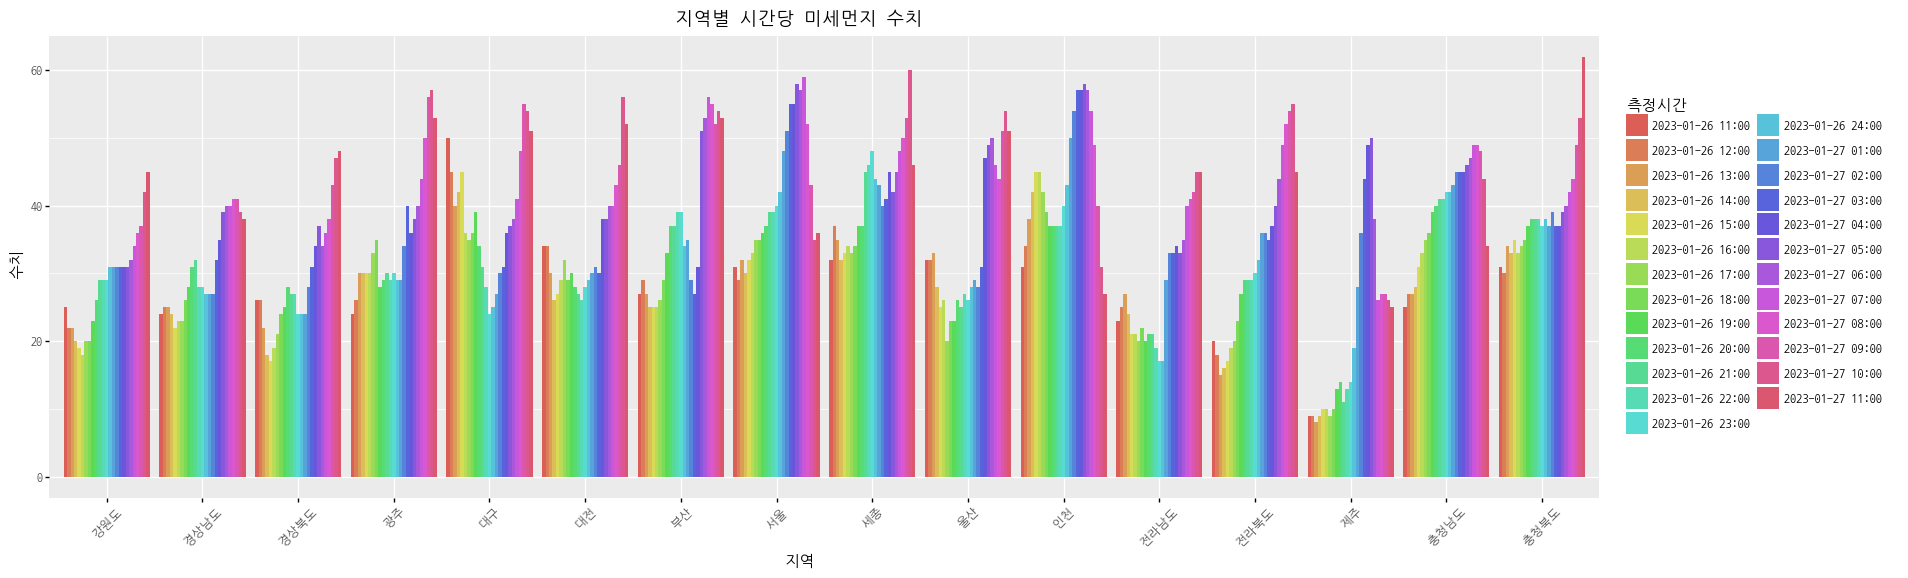

<ggplot: (111671809768)>

In [27]:
ggplot(result, aes(x='지역', y='수치', fill='측정시간')) \
    + geom_bar(stat='identity', position='dodge') \
    + theme(text=element_text(family='NanumGothicCoding'), figure_size=(20,6), axis_text_x=element_text(rotation=45)) \
    + ggtitle('지역별 시간당 미세먼지 수치')

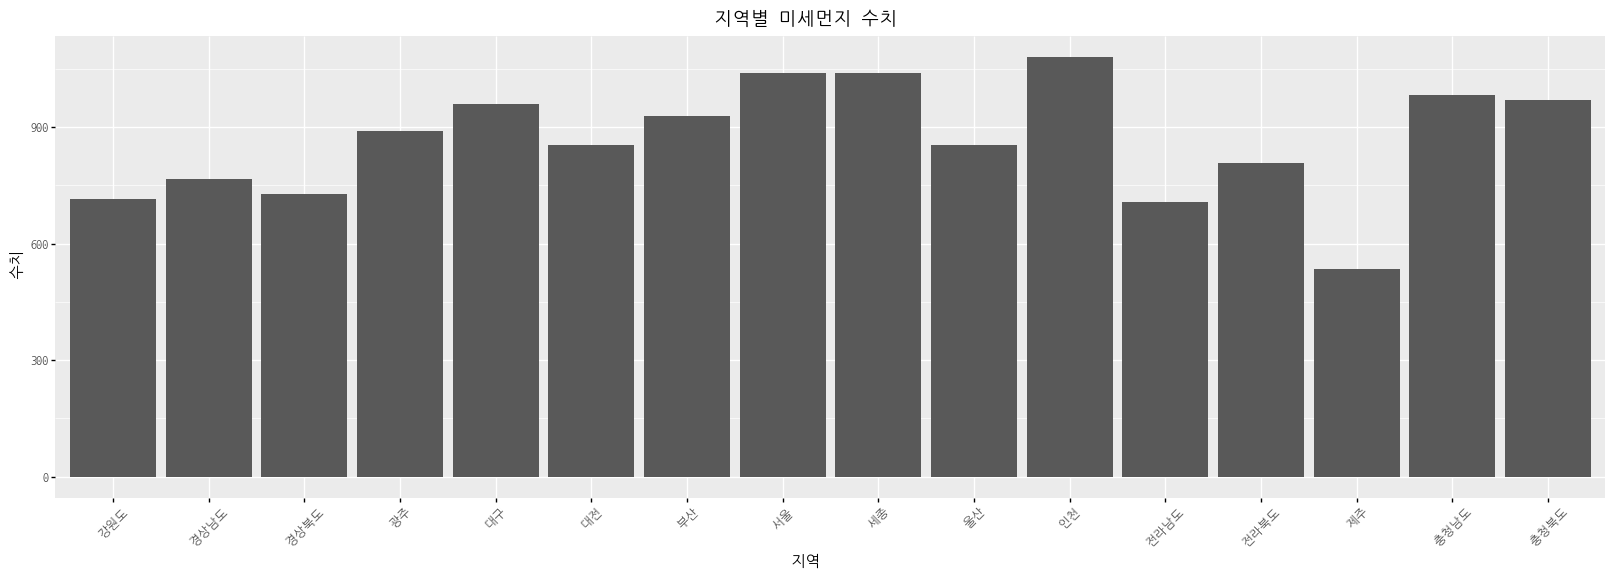

<ggplot: (-9223371925182522133)>

In [28]:
ggplot(sido_sum, aes(x='지역', y='수치')) \
    + geom_bar(stat='identity', position='dodge') \
    + theme(text=element_text(family='NanumGothicCoding'), figure_size=(20,6), axis_text_x=element_text(rotation=45)) \
    + ggtitle('지역별 미세먼지 수치')

In [29]:
df=df.transpose()
df

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
대구,51,54,55,48,41,38,37,36,31,30,...,0,0,0,0,0,0,0,0,0,0
충청남도,34,44,48,49,49,47,46,45,45,45,...,0,0,0,0,0,0,0,0,0,0
인천,27,31,40,49,54,57,58,57,57,54,...,0,0,0,0,0,0,0,0,0,0
대전,52,56,46,43,40,40,38,38,30,31,...,0,0,0,0,0,0,0,0,0,0
경상북도,48,47,43,38,36,34,37,34,31,28,...,0,0,0,0,0,0,0,0,0,0
세종,46,60,53,50,48,45,42,45,41,40,...,0,0,0,0,0,0,0,0,0,0
광주,53,57,56,50,44,40,38,36,40,34,...,0,0,0,0,0,0,0,0,0,0
전라북도,45,55,54,52,49,44,40,37,35,36,...,0,0,0,0,0,0,0,0,0,0
강원도,45,42,37,36,34,32,31,31,31,31,...,0,0,0,0,0,0,0,0,0,0
울산,51,54,51,44,46,50,49,47,31,28,...,0,0,0,0,0,0,0,0,0,0


In [30]:
df.rename(columns=df.iloc[16],inplace=True)
df = df.drop(df.index[16])
df

,대구,충청남도,인천,대전,경상북도,세종,광주,전라북도,강원도,울산,...,광주,전라북도,강원도,울산,전라남도,서울,부산,제주,충청북도,경상남도
대구,51,54,55,48,41,38,37,36,31,30,...,0,0,0,0,0,0,0,0,0,0
충청남도,34,44,48,49,49,47,46,45,45,45,...,0,0,0,0,0,0,0,0,0,0
인천,27,31,40,49,54,57,58,57,57,54,...,0,0,0,0,0,0,0,0,0,0
대전,52,56,46,43,40,40,38,38,30,31,...,0,0,0,0,0,0,0,0,0,0
경상북도,48,47,43,38,36,34,37,34,31,28,...,0,0,0,0,0,0,0,0,0,0
세종,46,60,53,50,48,45,42,45,41,40,...,0,0,0,0,0,0,0,0,0,0
광주,53,57,56,50,44,40,38,36,40,34,...,0,0,0,0,0,0,0,0,0,0
전라북도,45,55,54,52,49,44,40,37,35,36,...,0,0,0,0,0,0,0,0,0,0
강원도,45,42,37,36,34,32,31,31,31,31,...,0,0,0,0,0,0,0,0,0,0
울산,51,54,51,44,46,50,49,47,31,28,...,0,0,0,0,0,0,0,0,0,0


In [31]:
df.insert(0, '지역', df.index)
df = df.reset_index(drop=True)
df

,지역,대구,충청남도,인천,대전,경상북도,세종,광주,전라북도,강원도,...,광주,전라북도,강원도,울산,전라남도,서울,부산,제주,충청북도,경상남도
0,대구,51,54,55,48,41,38,37,36,31,...,0,0,0,0,0,0,0,0,0,0
1,충청남도,34,44,48,49,49,47,46,45,45,...,0,0,0,0,0,0,0,0,0,0
2,인천,27,31,40,49,54,57,58,57,57,...,0,0,0,0,0,0,0,0,0,0
3,대전,52,56,46,43,40,40,38,38,30,...,0,0,0,0,0,0,0,0,0,0
4,경상북도,48,47,43,38,36,34,37,34,31,...,0,0,0,0,0,0,0,0,0,0
5,세종,46,60,53,50,48,45,42,45,41,...,0,0,0,0,0,0,0,0,0,0
6,광주,53,57,56,50,44,40,38,36,40,...,0,0,0,0,0,0,0,0,0,0
7,전라북도,45,55,54,52,49,44,40,37,35,...,0,0,0,0,0,0,0,0,0,0
8,강원도,45,42,37,36,34,32,31,31,31,...,0,0,0,0,0,0,0,0,0,0
9,울산,51,54,51,44,46,50,49,47,31,...,0,0,0,0,0,0,0,0,0,0


In [32]:
df.columns

Index(['지역', '대구', '충청남도', '인천', '대전', '경상북도', '세종', '광주', '전라북도', '강원도',
       ...
       '광주', '전라북도', '강원도', '울산', '전라남도', '서울', '부산', '제주', '충청북도', '경상남도'],
      dtype='object', length=401)

In [33]:
df

,지역,대구,충청남도,인천,대전,경상북도,세종,광주,전라북도,강원도,...,광주,전라북도,강원도,울산,전라남도,서울,부산,제주,충청북도,경상남도
0,대구,51,54,55,48,41,38,37,36,31,...,0,0,0,0,0,0,0,0,0,0
1,충청남도,34,44,48,49,49,47,46,45,45,...,0,0,0,0,0,0,0,0,0,0
2,인천,27,31,40,49,54,57,58,57,57,...,0,0,0,0,0,0,0,0,0,0
3,대전,52,56,46,43,40,40,38,38,30,...,0,0,0,0,0,0,0,0,0,0
4,경상북도,48,47,43,38,36,34,37,34,31,...,0,0,0,0,0,0,0,0,0,0
5,세종,46,60,53,50,48,45,42,45,41,...,0,0,0,0,0,0,0,0,0,0
6,광주,53,57,56,50,44,40,38,36,40,...,0,0,0,0,0,0,0,0,0,0
7,전라북도,45,55,54,52,49,44,40,37,35,...,0,0,0,0,0,0,0,0,0,0
8,강원도,45,42,37,36,34,32,31,31,31,...,0,0,0,0,0,0,0,0,0,0
9,울산,51,54,51,44,46,50,49,47,31,...,0,0,0,0,0,0,0,0,0,0
